In [1]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

## 高斯分布：
$
P(x|\mu,\Sigma) = 
\frac{1}{(2\pi)^\frac{D}{2}} 
\frac{1}{\Sigma^{\frac{1}{2}}}
exp\left\{-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu)\right\}
$   

高斯分布的贝叶斯推断：    
$ \mu = \frac{1}{N}\sum_{n=1}^Nx_n $    
$ \Sigma = \frac{1}{N-1}\sum_{n=1}^N(x_n-\mu)^T(x_n-\mu) $

In [32]:
class GaussianNB():
    
    """
    假设特征符合高斯分布，采用最大似然概率计算出P(x|y)的mu及sigma，然后通过贝叶斯定理计算P（y|x）
    修改：
    1. 采用ndarray来存放数据（初始的维度？在函数中创建还是类中创建？）
    2. 
    """
    
    def fit(self, X, y):
        n_features = X.shape[1]
        n_classes = len(np.unique(y))    
        
        self.mu = np.zeros((n_classes, n_features))
        self.sigma = np.zeros((n_classes, n_features, n_features))
        self.classes = np.unique(y)
        
        for y_i in self.classes:
            i = self.classes.searchsorted(y_i)   # y与mu、sigma建立对应关系
            X_i = X[y == y_i]
            self.mu[i, :] = np.mean(X_i, axis=0)
            self.sigma[i] = (1/(X_i.shape[0]-1)) * ( (X_i-self.mu[i, :]).T.dot(X_i-self.mu[i, :]) ) 
        self.sigma
        return self
            
    def predict(self, X):
        predict_y = np.zeros(X.shape[0])
        probability = np.zeros((X.shape[0], len(self.classes)))
        for n, X_i in enumerate(X): 
            for y_i in self.classes:
                i = self.classes.searchsorted(y_i)
                probability[n, i] =( 1/( (2*np.pi)**0.5*np.linalg.det(self.sigma[i])**0.5 ) * 
                              np.exp(-0.5*((X_i-self.mu[i].T)@(np.linalg.inv(self.sigma[i]))@(X_i-self.mu[i])) ))
                                
        
        p_max_index = np.argmax(probability, axis=1)
        classes = self.classes
        predict_y = np.asarray([self.classes[x] for x in p_max_index])
        #predict_y = self.classes[range(len(probability)), p_max_index]
            
        return predict_y

0.8000
[[[0.12424898 0.09921633]
  [0.09921633 0.1436898 ]]

 [[0.26643265 0.08518367]
  [0.08518367 0.09846939]]

 [[0.40434286 0.09376327]
  [0.09376327 0.10400408]]]


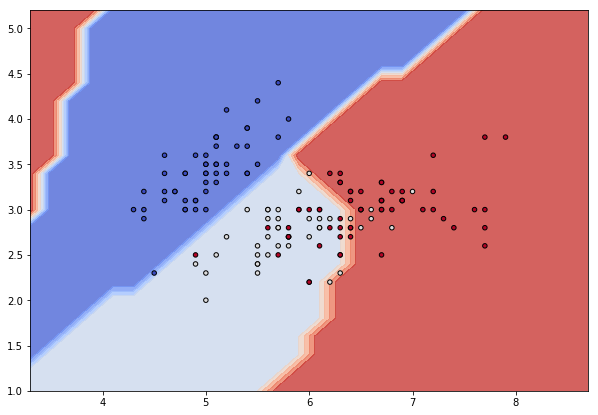

In [33]:
def make_meshgrid(x, y, h=0.2):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                              np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(xx, yy, **params):
    np.c_[xx.ravel(), yy.ravel()]
    Z = nb.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out


iris = datasets.load_iris()
x = iris.data[:,:2]
y = iris.target

c = int(np.floor(x.shape[0]*0.8))
"""train_x = x[:c]
train_y = y[:c]
test_x = x[c:]
test_y = y[c:]
"""
nb = GaussianNB()
nb.fit(x, y)

X1, X2 = x[:,0], x[:,1]
xx, yy = make_meshgrid(X1, X2)
figure, ax = plt.subplots(figsize=(10,7))
plot_contours(xx, yy, cmap = plt.cm.coolwarm, alpha=0.8)
plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

# 计算预测的准确率
total_num = len(y)
positive_num = (nb.predict(x)==y).sum()
accuracy = positive_num/total_num
print('%.4f'%accuracy)
print(nb.sigma)

array([3, 2, 2, 2, 0], dtype=int64)

In [41]:
x = np.arange(12).reshape(3,2,2)
x=2
x

2

In [85]:
np.as

2

In [6]:
x[[1,2],:]-b

array([[3, 3, 3, 3],
       [7, 7, 7, 7]])

In [104]:
class NaiveBayesian():
    """
    假设特征符合高斯分布，采用最大似然概率计算出P(x|y)的mu及sigma，然后通过贝叶斯定理计算P（y|x）
    修改：
    1. 采用ndarray来存放数据（初始的维度？在函数中创建还是类中创建？）
    2. 
    """
    mus = []
    sigmas = []
    probability = []
    target = []
    
    def fit(self, x, y):
        _x = []
        self.mus = []
        self.sigmas = []
        self.target = np.unique(y)
        for i, _y in enumerate(np.unique(y)):
            _x.append(x[y == _y])
            self.mus.append(np.mean(_x[i], axis=0))
            self.sigmas.append(np.transpose(_x[i] -self. mus[i]).dot(_x[i]-self.mus[i])/_x[i].shape[0])

    def predict(self, x):
        predict_y = []
        self.probability = []
        for x_ in x:
            p = []
            for mu,sigma in zip(self.mus,self.sigmas):
                # print(x_ - mu)
#             print(np.linalg.inv(sigma))
                pow_ = np.exp(-np.transpose(x_ - mu).dot(np.linalg.inv(sigma)).dot(x_ - mu)/2)
                factor = 1/(np.pi**(sigma.shape[0]/2)*2)/np.linalg.det(sigma)**(0.5)
                p.append(pow_ / factor)
            p_ = np.array(p)
            self.probability.append(p_/p_.sum())
            
        for p in self.probability:
            predict_y.append(self.target[p.argmax()])
            
        return np.array(predict_y)